# **BELLABEAT CASE STUDY IN EXCEL, SQL AND R**

 ## **Introduction**
This analysis focuses on the data collected from "FitBit Fitness Tracker", one of
Bellabeat’s health-focused smart device products. 

Bellabeat is a high-tech manufacturer of health focused products for women. Bellabeat manufactures high-tech smart devices that monitor, collect data, and analyse  daily activities, sleep, weight, stress, and reproductive health to help women recognize partern in their daily activities and improve their overall health.

## **Business Task**

*Analyze Bellabeat fitbit smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company.*

## **Bunsiness goal**

This analysis is aimed at the following business goals:
a) To gain insights into how consumers use their smart devices. 
b) To use the insights gained to guide marketing strategy for the company. 
c) To present the analysis to the Bellabeat executive team with high-level recommendations for marketing strategy.

# Primary Stakeholders

* Urška Sršen
* Sando Mur.
* Bellabeat marketing analytics team

## Dataset 

The data "FitBit Fitness Tracker Data" is used for this analysis. The data is available in kaggle. 

Data source: <https://www.kaggle.com/datasets/arashnic/fitbit>

It consists of 18 files in CSV format.


## The six(6) data analysis process

This analysis is done following the six(6) steps of data analytics process *(ask, prepare, process, analyze, share,and act)*. The insights gained from this analysis will help guide marketing strategy for the company.

## 1 Ask

Primary stakeholders of Bellabeat want an analysis of smart device usage data. The insights gained in this analysis will help them to expand their smart device products in the global market.

For clear understanding of this analysis, the following questions will be examined:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?
4. How can the insights gained from this analysis drive business decisions Bellabeat?

## Deliverables

To present the analysis to the Bellabeat executive team with high-level recommendations for marketing strategy.

## 2 Prepare

This dataset FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius), was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty (30) eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits

This dataset is examined using the ROCCC approach thus;
* **Reliable:** This dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk. 
* **Original:** The data is from thirty(30) eligible Fitbit users who consented to the submission of personal tracker data.
* **Comprehensive:** The data consists of minute, hourly, and daily records of users activities.
* **Current:** The data is from 12th March 2016 to 12th May 2016. Therefore, the data is not current.
* **Cited:** CC0: Public Domain, dataset made available through Mobius.

The data has some limitations in that it consists of 30 users and was collected within a period of 30 days. It does not contain some key characteristics such as demographics, age, lifestyle, body physics, stress tracking data etc. Thus the data is too small for proper analysis.

For this analysis the datasets for dailyactivity_merged, sleepday_merged, and weightLogInfo_merged, will be used

## 3 Process

I used excel to format the date column of datilyActivity_merged, and sleepDay_merged into usable format of "date" respectively, and imported them into Postgresql database. I also used excel pivot  table to analyse and visualise few findings which will be shared in the "Share" phase of the anlysis process

##SQL QUERIES
I created new talbes in postgresql database in order to import, read and clean the required CSV files

In [ ]:
#--Creating tables in posgresql database
CREATE TABLE public."dailyactivity_merged"(
    Id bigint, ActivityDate date, 
    TotalSteps int, TotalDistance float, 
    TrackerDistance float, LoggedActivitiesDistance float, 
    VeryActiveDistance float, ModeratelyActiveDistance float, 
    LightActiveDistance float, SedentaryActiveDistance	float, 
    VeryActiveMinutes	int, FairlyActiveMinutes int, 
    LightlyActiveMinutes int, SedentaryMinutes	int, Calories int)


CREATE TABLE public."sleepday_merged"(
    Id bigint, 
    SleepDay date,
    TotalSleepRecords int, 
    TotalMinutesAsleep int, 
    TotalTimeInBed int)

CREATE TABLE public."weightloginfo_merged"(
    Id bigint, Date varchar(100),	
    WeightKg float, WeightPounds float, 
    Fat int, BMI float, 
    IsManualReport boolean, LogId varchar)

In [ ]:
#-- importing csv files into postgresql database tables

COPY public."sleepday_merged" 
FROM '/home/ejiks/bellabeat/sleepday1.csv' 
DELIMITER ',' 
CSV HEADER;

COPY public."dailyactivity_merged" 
FROM '/home/ejiks/bellabeat/dailyactivity_merged.csv' 
DELIMITER ',' 
CSV HEADER;

COPY public."weightloginfo_merged" 
FROM '/home/ejiks/bellabeat/weightLogInfo_merged.csv' 
DELIMITER ',' 
CSV HEADER;

In [ ]:
# -- reading the data.

SELECT * from public."sleepday_merged"
SELECT * from public."dailyactivity_merged"
SELECT * from public."weightloginfo_merged"

#### **Cleaning the data in Postgresql**  

At this point, I will check for duplicates in the tables 
and delete them if any exists

In [ ]:
SELECT *, count(*)
FROM sleepday_merged
GROUP BY Id, SleepDay,
    TotalSleepRecords, TotalMinutesAsleep,
    TotalTimeInBed
HAVING COUNT(*) > 1

SELECT *, count(*)
FROM weightloginfo_merged
GROUP BY Id, Date, 
    WeightKg, WeightPounds, Fat, 
    BMI, IsManualReport, 
    LogId
HAVING COUNT(*) > 1

SELECT *, count(*)
FROM dailyactivity_merged
GROUP BY Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, 
    LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, 
    LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, 
    FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, 
    Calories
HAVING COUNT(*) > 1

#### **Observations** 
 There are three(3) duplicate rows in the 'sleepday_merged table'.
 There are no duplicate rows in 'dailyactivity_merged' and 'weightlonginfo_merged tables'
 
 #### **Removing duplicates** 

I will remove duplicates from 'sleepday_merged' 
table by creating a new table 'sleepday' with distict values from 'sleepday_merged' table. 
Reason is to keep the original data

In [ ]:

SELECT DISTINCT Id, SleepDay,
    TotalSleepRecords, TotalMinutesAsleep,
    TotalTimeInBed
INTO sleepday
FROM sleepday_merged
order by id

In [ ]:
# --Checking new table

SELECT *, count(*)
FROM sleepday
GROUP BY Id, SleepDay,
    TotalSleepRecords, TotalMinutesAsleep,
    TotalTimeInBed
HAVING COUNT(*) > 1

 
#### **Checking for NULL values**

In [ ]:
SELECT *
FROM weightloginfo_merged
WHERE Fat IS NULL 


#### **Observations** 
65 rows in the 'weightloginfo_merged' 
table have NULL values in the 'FAT' column.


## **4 Analyse**

I imported the cleaned data from postgresql to R for further cleaning, analysis and visualisation. 

### **Loading necessary packages in R**

I will start by installing and loading "tidyverse", "skimr", "here", "janitor", "dplyr", and  "ggplot2"

In [2]:
library(tidyverse)
library(dplyr)
library(skimr)
library(here)
library(janitor)
library(lubridate)
library(ggplot2)
library(readr)

Importing CSV files into R

In [6]:
dailyactivity <- read_csv("../input/bellabeat/dailyactivity.csv")
sleepday <- read_csv("../input/bellabeat/sleepday.csv")
weightLogInfo_merged <- read_csv("../input/bellabeat/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (4): id, totalsleeprecords, totalminutesasleep, totaltimeinbed
date (1): sleepday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification 

## Renaming columns for consistency

In [7]:
dailyactivity <- rename_with(dailyactivity, tolower)
sleepday <- rename_with(sleepday, tolower)
rename_with(weightLogInfo_merged, tolower)
head(sleepday)
head(weightLogInfo_merged)
head(dailyactivity)

id,date,weightkg,weightpounds,fat,bmi,ismanualreport,logid
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 23:59:00,52.6,115.9631,22,22.65,TRUE,1.46e+12
1503960366,5/3/2016 23:59:00,52.6,115.9631,NA,22.65,TRUE,1.46e+12
1927972279,4/13/16 1:08,133.5,294.3171,NA,47.54,FALSE,1.46e+12
2873212765,4/21/16 23:59,56.7,125.0021,NA,21.45,TRUE,1.46e+12
2873212765,5/12/2016 23:59:00,57.3,126.3249,NA,21.69,TRUE,1.46e+12
4319703577,4/17/16 23:59,72.4,159.6147,25,27.45,TRUE,1.46e+12
4319703577,5/4/2016 23:59:00,72.3,159.3942,NA,27.38,TRUE,1.46e+12
4558609924,4/18/16 23:59,69.7,153.6622,NA,27.25,TRUE,1.46e+12
4558609924,4/25/16 23:59,70.3,154.9850,NA,27.46,TRUE,1.46e+12


id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 23:59:00,52.6,115.9631,22,22.65,TRUE,1.46e+12
1503960366,5/3/2016 23:59:00,52.6,115.9631,NA,22.65,TRUE,1.46e+12
1927972279,4/13/16 1:08,133.5,294.3171,NA,47.54,FALSE,1.46e+12
2873212765,4/21/16 23:59,56.7,125.0021,NA,21.45,TRUE,1.46e+12
2873212765,5/12/2016 23:59:00,57.3,126.3249,NA,21.69,TRUE,1.46e+12
4319703577,4/17/16 23:59,72.4,159.6147,25,27.45,TRUE,1.46e+12


id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


## Converting Minutes to hours in 'sleepday' data

This is achieved by creating a new column "hoursasleep" in the sleepday data frame

In [8]:
sleepday <- mutate(sleepday, hoursasleep=totalminutesasleep/60)

# creating a data frame for average totalsteps and averege claories

avg_activity <- dailyactivity %>% group_by(id) %>% 
  summarise(mean_cal = mean(calories),
            mean_steps = mean(totalsteps))
head(avg_activity)
head(sleepday)

id,mean_cal,mean_steps
<dbl>,<dbl>,<dbl>
1503960366,1816.419,12116.742
1624580081,1483.355,5743.903
1644430081,2811.300,7282.967
1844505072,1573.484,2580.065
1927972279,2172.806,916.129
2022484408,2509.968,11370.645


id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed,hoursasleep
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346,5.450000
1503960366,2016-04-13,2,384,407,6.400000
1503960366,2016-04-15,1,412,442,6.866667
1503960366,2016-04-16,2,340,367,5.666667
1503960366,2016-04-17,1,700,712,11.666667
1503960366,2016-04-19,1,304,320,5.066667


Merging dailyactivity and sleepday dataframes for cross-reference analysis

In [11]:
dailyactivity_sleepday_merged <- merge(sleepday, dailyactivity, by.x="id", by.y="id")
head(dailyactivity_sleepday_merged)

,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed,hoursasleep,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,1,327,346,5.45,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821
2,1503960366,2016-04-12,1,327,346,5.45,5/6/2016,12159,8.03,8.03,0,1.97,0.25,5.81,0,24,6,289,754,1896
3,1503960366,2016-04-12,1,327,346,5.45,5/1/2016,10602,6.81,6.81,0,2.29,1.60,2.92,0,33,35,246,730,1820
4,1503960366,2016-04-12,1,327,346,5.45,4/30/2016,14673,9.25,9.25,0,3.56,1.42,4.27,0,52,34,217,712,1947
5,1503960366,2016-04-12,1,327,346,5.45,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
6,1503960366,2016-04-12,1,327,346,5.45,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797


In [12]:
#correlation between 

corr <- dailyactivity %>% group_by(id) %>% drop_na() %>% 
  summarise(corre=cor(totalsteps, calories))
head(corr)

id,corre
<dbl>,<dbl>
1503960366,0.8919450
1624580081,0.9305894
1644430081,0.9137225
1844505072,0.9166721
1927972279,0.8218038
2022484408,0.7600246


## **5 Share**

I use ggplot mostly and few excel charts to visualise the data



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



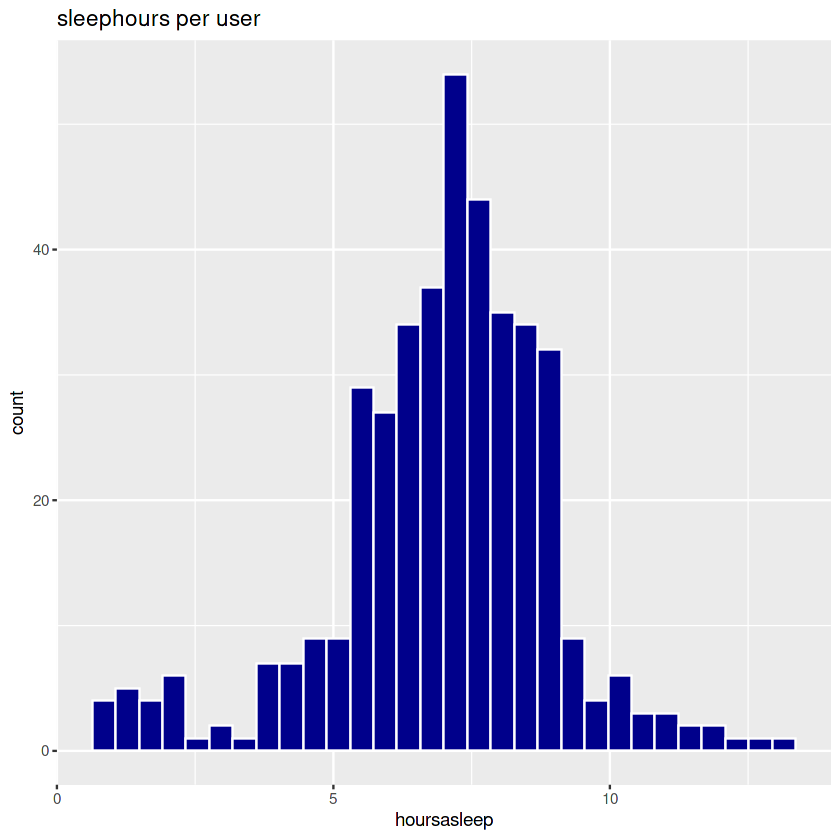

In [13]:
# Sleep hours per user

ggplot(data = sleepday, aes(x=hoursasleep)) + 
geom_histogram(color="white", fill="darkblue") + 
labs(title="sleephours per user", x='hoursasleep')

## Relationship between totalsteps and calories burned

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



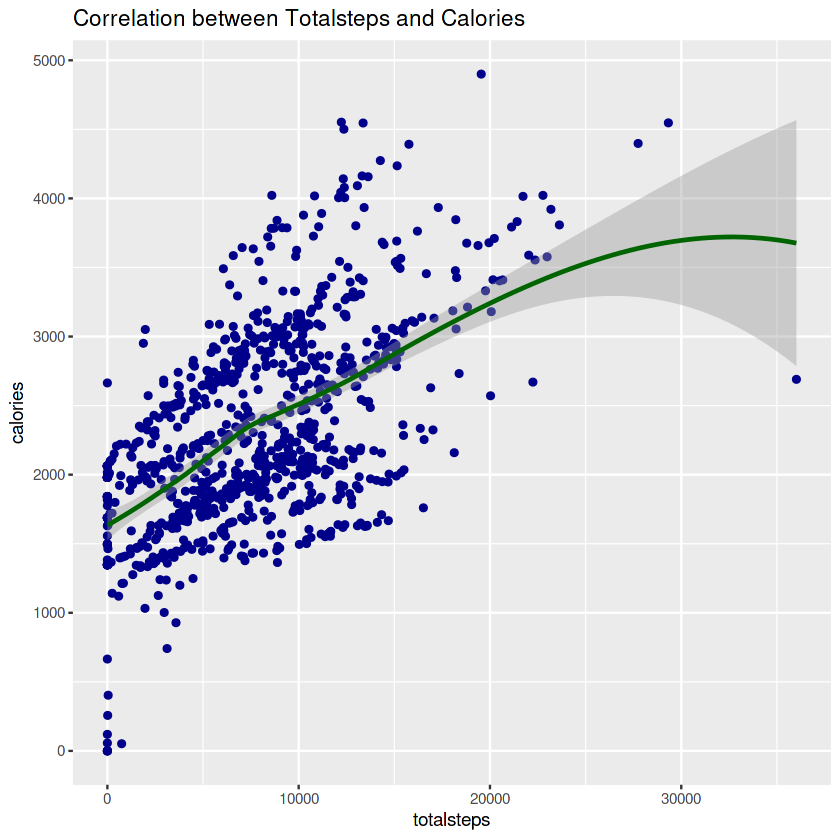

In [14]:
ggplot(data = dailyactivity, aes(x=totalsteps, y=calories)) + geom_point(color="darkblue") + 
  geom_smooth(color="darkgreen") + labs(title="Correlation between Totalsteps and Calories")

To support the above plot, I used excel piviot table to sumarise (hoursasleep and total steps), (hoursasleep, total steps, and calories) to find a pattern between the variables. Below are charts from the pivot table.

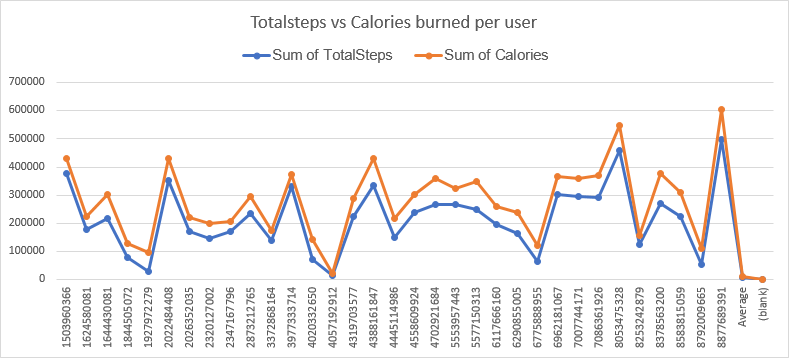

The plots above show the relationship between two variables(totalsteps and calories burned). From the plots, it is obsereved that the higher the steps taken by a user the higher the calories burned, and at the same time the lower the steps taken by a user the lower the calories burned

### Hours asleep vs Total steps vs calories burned

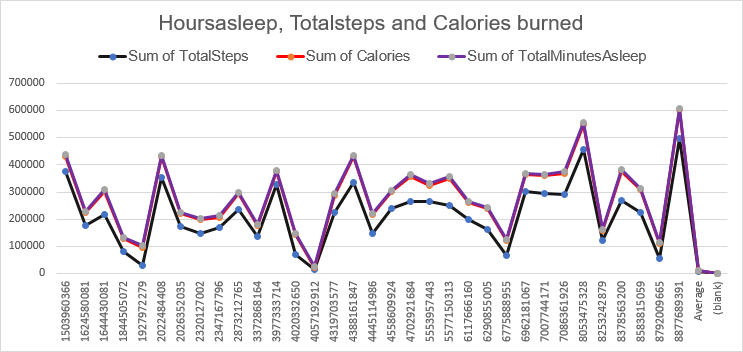


The plot above shows a clear patern and trend between the three variables(hoursasleep, totalsteps and claories). From the plot, users who get adequate sleep(7 or more hours) make more steps and at the same time burn more calories. Also, there is a positive correlation between hoursaleep , totalsteps and calories burned. On the other hand, there is a perfect positive correlation between hoursasleep and calories burned.

### Totaldistance vs Calories

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



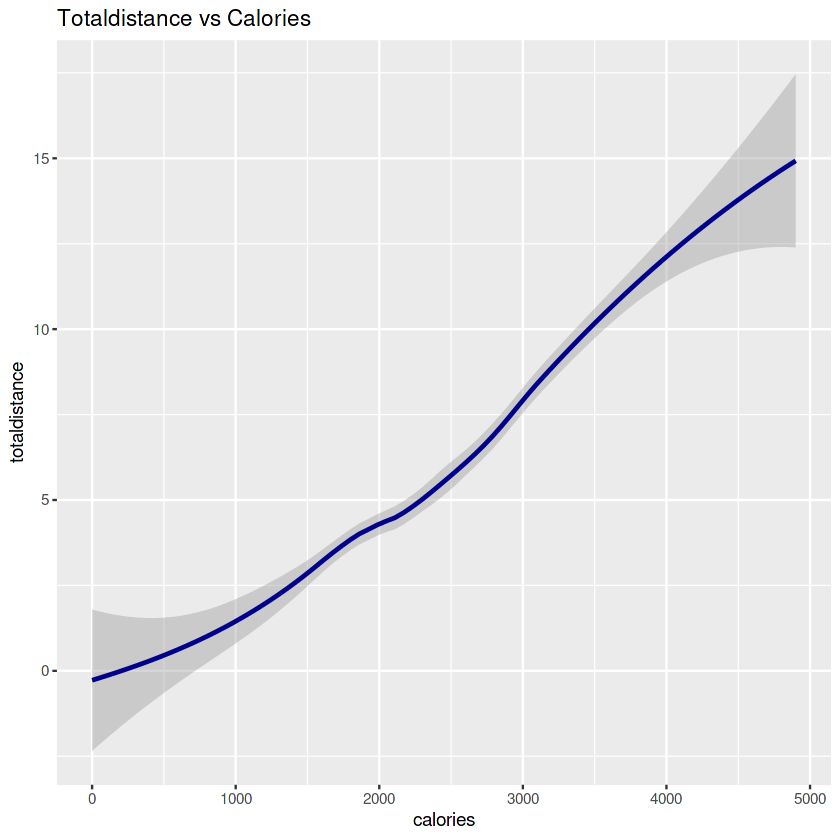

In [15]:
ggplot(data = dailyactivity) + 
  geom_smooth(mapping=aes(x=calories, y=totaldistance), color="darkblue") + 
  labs(title="Totaldistance vs Calories")

The chart above shows that the more distance a user walks, the more calories the user burns

### Correlation between totalsteps and calories burned

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



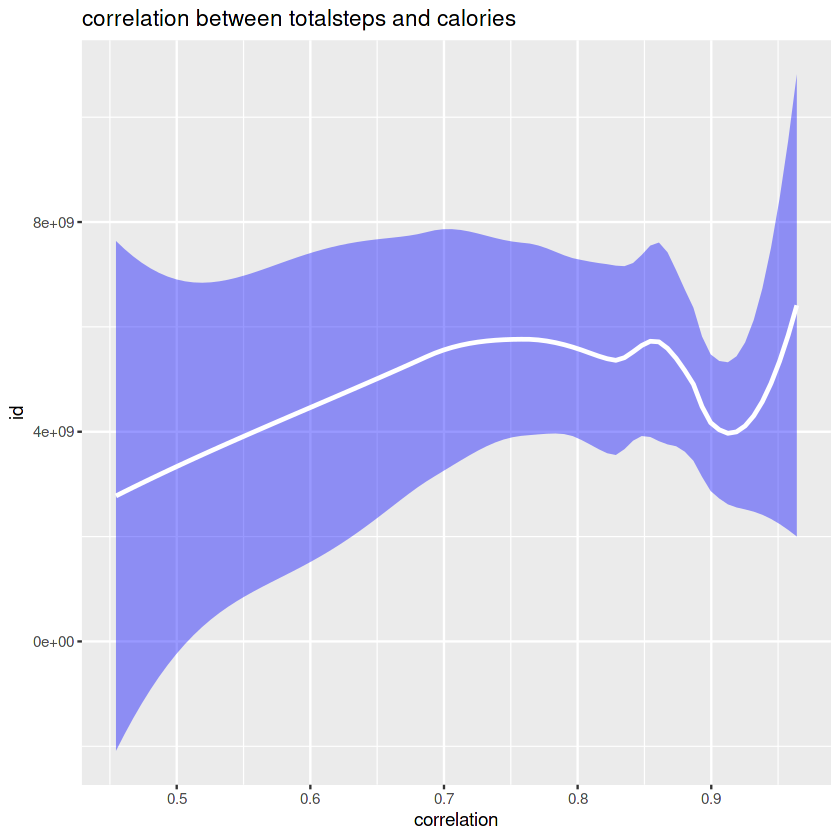

In [16]:
ggplot(data = corr) + 
  geom_smooth(mapping=aes(x=corre, y=id), color="white", fill="blue") + 
  labs(title="correlation between totalsteps and calories", x='correlation')

The plot above shows that there is a clear correlation between total steps and calories burn. Thus, the higher the steps, the higher the calories burned.

#### Average totalsteps vs average calories burned

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



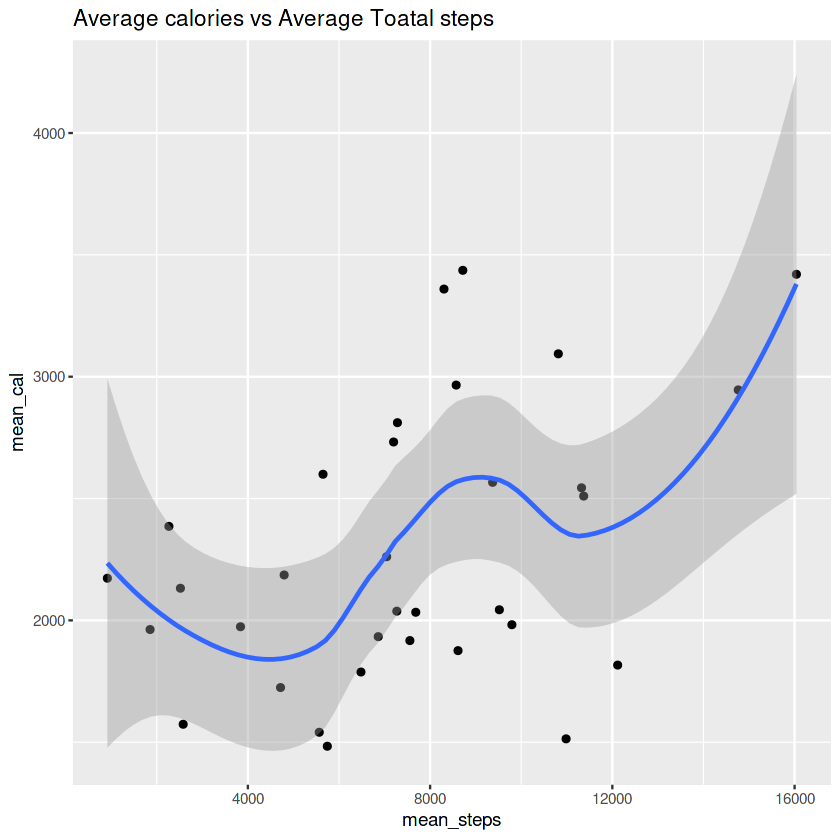

In [17]:
ggplot(data=avg_activity, aes(x=mean_steps, y=mean_cal)) + 
  geom_point() + geom_smooth() + labs(title="Average calories vs Average Toatal steps")

## 6 Act


#### **Key Findings:**
1. There is a clear and consistent pattern between the hours asleep, total steps and calories burned.
2. Users who slept from 7 hours and above make more steps and burn more calories
3. The data is limited. There is no demographics,age, stress record, rest record etc. of users
4. Users spent much of their time on lightly-active and sedentary-active minutes and as a result burn less calories.
5. Some users do not get sufficient sleep as recommended by experts, which affects their performance negatively.

**Recommendations**

1. The company should include enough information and records in their devices so as to give complete and adequate information to users.
2. There should be records of stress and rest as they contribute immensely to user's every day health status.
3. Since the target customer is women, the company should create their devices in a fancy and fashionable way. This will not only motivate users to wear them always, it will also fast track the marketing strategy since it will serve two purposes of fashion and health.
4. The devices should be able to accurately read and detect body pressure.


### **Sources**

1. [WEBMD](https://www.webmd.com/sleep-requirements#:~:text=Most%20adults%20need%207%20to,hours%20of%20sleep%20than%20usual.)
2. [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html)
3. [MAYOCLINIC](https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/how-many-hours-of-sleep-are-enough/faq-20057898)
4. [INVESTOPEDIA](https://www.investopedia.com/ask/answers/040915/what-difference-between-positive-correlation-and-inverse-correlation.asp)